In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm.autonotebook import tqdm
import pandas as pd
from keras import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.layers import Lambda, Input, GlobalAveragePooling2D,BatchNormalization
from keras.utils import to_categorical
# from keras import regularizers
from keras.models import Model
from keras.preprocessing.image import load_img

<ipython-input-1-fc067f93657b>:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load hình ảnh

Đổi tên thư mục thành nhãn

In [2]:
classes=os.listdir('/content/drive/MyDrive/dataset/train')
print(classes)

['mexican_hairless', 'dhole', 'dingo', 'toy_poodle', 'cardigan', 'pembroke', 'brabancon_griffon', 'african_hunting_dog', 'miniature_poodle', 'standard_poodle', 'great_pyrenees', 'leonberg', 'keeshond', 'affenpinscher', 'basenji', 'pomeranian', 'newfoundland', 'chow', 'pug', 'samoyed', 'tibetan_mastiff', 'saint_bernard', 'siberian_husky', 'boxer', 'malamute', 'eskimo_dog', 'bull_mastiff', 'french_bulldog', 'great_dane', 'entlebucher', 'german_shepherd', 'miniature_pinscher', 'border_collie', 'appenzeller', 'doberman', 'collie', 'greater_swiss_mountain_dog', 'bernese_mountain_dog', 'bouvier_des_flandres', 'rottweiler', 'schipperke', 'kelpie', 'irish_water_spaniel', 'groenendael', 'kuvasz', 'briard', 'malinois', 'komondor', 'old_english_sheepdog', 'shetland_sheepdog', 'brittany_spaniel', 'cocker_spaniel', 'irish_setter', 'clumber', 'vizsla', 'gordon_setter', 'welsh_springer_spaniel', 'english_springer', 'sussex_spaniel', 'english_setter', 'curly-coated_retriever', 'soft-coated_wheaten_ter

Hàm xóa prefix

In [5]:
def delete_prefix(list_st):
    for i in range(len(list_st)):
        for j in range(len(list_st[i])):
            if list_st[i][j] == '-':
                list_st[i]=list_st[i][j+1:]
                break

    return list_st


In [6]:
classes=delete_prefix(classes)
print(classes)
if len(classes)!=120:
    print('fail')

['Mexican_hairless', 'dhole', 'dingo', 'toy_poodle', 'Cardigan', 'Pembroke', 'Brabancon_griffon', 'African_hunting_dog', 'miniature_poodle', 'standard_poodle', 'Great_Pyrenees', 'Leonberg', 'keeshond', 'affenpinscher', 'basenji', 'Pomeranian', 'Newfoundland', 'chow', 'pug', 'Samoyed', 'Tibetan_mastiff', 'Saint_Bernard', 'Siberian_husky', 'boxer', 'malamute', 'Eskimo_dog', 'bull_mastiff', 'French_bulldog', 'Great_Dane', 'EntleBucher', 'German_shepherd', 'miniature_pinscher', 'Border_collie', 'Appenzeller', 'Doberman', 'collie', 'Greater_Swiss_Mountain_dog', 'Bernese_mountain_dog', 'Bouvier_des_Flandres', 'Rottweiler', 'schipperke', 'kelpie', 'Irish_water_spaniel', 'groenendael', 'kuvasz', 'briard', 'malinois', 'komondor', 'Old_English_sheepdog', 'Shetland_sheepdog', 'Brittany_spaniel', 'cocker_spaniel', 'Irish_setter', 'clumber', 'vizsla', 'Gordon_setter', 'Welsh_springer_spaniel', 'English_springer', 'Sussex_spaniel', 'English_setter', 'curly-coated_retriever', 'soft-coated_wheaten_ter

In [7]:
classes=[x.lower() for x in classes]
print(classes)

['mexican_hairless', 'dhole', 'dingo', 'toy_poodle', 'cardigan', 'pembroke', 'brabancon_griffon', 'african_hunting_dog', 'miniature_poodle', 'standard_poodle', 'great_pyrenees', 'leonberg', 'keeshond', 'affenpinscher', 'basenji', 'pomeranian', 'newfoundland', 'chow', 'pug', 'samoyed', 'tibetan_mastiff', 'saint_bernard', 'siberian_husky', 'boxer', 'malamute', 'eskimo_dog', 'bull_mastiff', 'french_bulldog', 'great_dane', 'entlebucher', 'german_shepherd', 'miniature_pinscher', 'border_collie', 'appenzeller', 'doberman', 'collie', 'greater_swiss_mountain_dog', 'bernese_mountain_dog', 'bouvier_des_flandres', 'rottweiler', 'schipperke', 'kelpie', 'irish_water_spaniel', 'groenendael', 'kuvasz', 'briard', 'malinois', 'komondor', 'old_english_sheepdog', 'shetland_sheepdog', 'brittany_spaniel', 'cocker_spaniel', 'irish_setter', 'clumber', 'vizsla', 'gordon_setter', 'welsh_springer_spaniel', 'english_springer', 'sussex_spaniel', 'english_setter', 'curly-coated_retriever', 'soft-coated_wheaten_ter

In [70]:
def find_name(name):
  for x in classes:
    if x in name.lower():
      return x
  return None

In [3]:
train_path=r'/content/drive/MyDrive/dataset/train'

In [71]:
test_path=r'/content/drive/MyDrive/dataset/val'

Đổi tên thư mục

In [72]:
for dir in os.listdir(train_path):
  new_name=find_name(dir)
  if new_name is not None:
    os.rename(train_path+'/'+dir,train_path+'/'+new_name)

Lấy số lượng

In [4]:
len_train=0
for dir in os.listdir(train_path):
  filenames=train_path+'/'+dir
  for file in os.listdir(filenames):
    len_train+=1
print(len_train)

16428


In [6]:
len_test=0
for dir in os.listdir(test_path):
  filenames=test_path+'/'+dir
  for file in os.listdir(filenames):
    len_test+=1
print(len_test)

4162


Tạo từ điển label

In [7]:
classes = sorted(classes)
n_classes = len(classes)
print('Total unique breed {}'.format(n_classes))

#Map each label string to an integer label.
class_to_num = dict(zip(classes, range(n_classes)))
class_to_num

Total unique breed 120


{'affenpinscher': 0,
 'afghan_hound': 1,
 'african_hunting_dog': 2,
 'airedale': 3,
 'american_staffordshire_terrier': 4,
 'appenzeller': 5,
 'australian_terrier': 6,
 'basenji': 7,
 'basset': 8,
 'beagle': 9,
 'bedlington_terrier': 10,
 'bernese_mountain_dog': 11,
 'black-and-tan_coonhound': 12,
 'blenheim_spaniel': 13,
 'bloodhound': 14,
 'bluetick': 15,
 'border_collie': 16,
 'border_terrier': 17,
 'borzoi': 18,
 'boston_bull': 19,
 'bouvier_des_flandres': 20,
 'boxer': 21,
 'brabancon_griffon': 22,
 'briard': 23,
 'brittany_spaniel': 24,
 'bull_mastiff': 25,
 'cairn': 26,
 'cardigan': 27,
 'chesapeake_bay_retriever': 28,
 'chihuahua': 29,
 'chow': 30,
 'clumber': 31,
 'cocker_spaniel': 32,
 'collie': 33,
 'curly-coated_retriever': 34,
 'dandie_dinmont': 35,
 'dhole': 36,
 'dingo': 37,
 'doberman': 38,
 'english_foxhound': 39,
 'english_setter': 40,
 'english_springer': 41,
 'entlebucher': 42,
 'eskimo_dog': 43,
 'flat-coated_retriever': 44,
 'french_bulldog': 45,
 'german_shepherd'

In [8]:
# Quét hình ảnh
input_shape = (331,331) # cỡ 331 x 331
def images_to_array(dir_path, lenght, limit=100, target_size = input_shape):
    id=0
    images = np.zeros([lenght, target_size[0], target_size[1]],dtype=np.uint8) #as we have huge data and limited ram memory. uint8 takes less memory
    y = np.zeros([lenght,1],dtype = np.uint8)
    for dir in os.listdir(dir_path):
      filenames=dir_path+'/'+dir
      list_file=os.listdir(filenames)
      n=len(list_file)
      if n<limit:
        print('fail!')
        return None, None
      for file in list_file[:limit]:
        file_path=filenames+'/'+file
        img = load_img(file_path, target_size = target_size, color_mode = 'grayscale')# ảnh xám
#         img = img/255
        images[id]=img
        del img
        y[id] = class_to_num[dir]
        id+=1
    y = to_categorical(y)# lưu thành one hot label
    return images,y

In [9]:
import time
t = time.time()
limit=80
X,y = images_to_array(train_path, n_classes*limit, limit)

print('runtime in seconds: {}'.format(time.time() - t))

runtime in seconds: 43.50888204574585


In [39]:
X.shape

(9600, 331, 331)

In [10]:
shuffle_indices = np.random.permutation(X.shape[0])
X = X[shuffle_indices]
y=y[shuffle_indices]

In [42]:
n=25
# setup the figure
plt.figure(figsize=(20,20))
for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32'), cmap='gray') # .astype('int32') ---> as imshow() needs integer data to read the image

Output hidden; open in https://colab.research.google.com to view.

Cân bằng độ tương phản hình ảnh

In [12]:
import cv2
clahe_16=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(16,16))

In [13]:
for i in range(X.shape[0]):
    X[i]=clahe_16.apply(X[i,:,:])

In [45]:
n=25

# setup the figure
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32'), cmap='gray') # .astype('int32') ---> as imshow() needs integer data to read the image

Output hidden; open in https://colab.research.google.com to view.

Làm mịn hình

In [14]:
for i in range(X.shape[0]):
    X[i]=cv2.medianBlur(X[i,:,:],3)

In [47]:
n=25

# setup the figure
plt.figure(figsize=(20,20))

for i in range(n):
#     print(i)
    ax = plt.subplot(5, 5, i+1)
    plt.title(classes[np.where(y[i] ==1)[0][0]])
    plt.imshow(X[i].astype('int32'), cmap='gray') # .astype('int32') ---> as imshow() needs integer data to read the image

Output hidden; open in https://colab.research.google.com to view.

Chuyển kênh 1 sang kênh 3 để học với transfer learning

In [15]:
def expand_gray_scale(X):
    X_3_channel = X.repeat(3, axis=-1) #expand to 3 dimension
    return X_3_channel

In [16]:
X_3=expand_gray_scale(X.reshape(X.shape[0],X.shape[1],X.shape[2],1))

In [51]:
X_3.shape

(9600, 331, 331, 3)

In [17]:
del(X)

Khai báo các biến phục vụ cho huấn luyện

In [18]:
#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
# Hyperparameters
batch_size= 128
epochs=50
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

Tạo hàm tự tạo mô hình transfer learning dựa theo model_name truyền vào

Các mô hình sử dụng: InceptionV3, Xception, InceptionResNetV2, NASNetLarge

In [20]:
#function to extract features from the dataset by a given pretrained model
img_size = (331,331,3)

def get_features(model_name, model_preprocessor, input_size, data):

    input_layer = Input(input_size)
    preprocessor = Lambda(model_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False,
                            input_shape=input_size)(preprocessor)
    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)

    #Extract feature.
    feature_maps = feature_extractor.predict(data, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [55]:
# Extract features using InceptionV3
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input
inception_features = get_features(InceptionV3,
                                  inception_preprocessor,
                                  img_size, X_3)

300/300 [==============================] - 47s 130ms/step
Feature maps shape:  (9600, 2048)


Lưu trữ

In [59]:
np.save('/content/drive/MyDrive/dataset/inception_features.npy',inception_features)

In [21]:
# Extract features using Xception
from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input
xception_features = get_features(Xception,
                                 xception_preprocessor,
                                 img_size, X_3)

300/300 [==============================] - 103s 312ms/step
Feature maps shape:  (9600, 2048)


Lưu trữ

In [22]:
np.save('/content/drive/MyDrive/dataset/xception_features.npy',xception_features)

In [24]:
# Extract features using InceptionResNetV2
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input
inc_resnet_features = get_features(InceptionResNetV2,
                                   inc_resnet_preprocessor,
                                   img_size, X_3)

300/300 [==============================] - 120s 366ms/step
Feature maps shape:  (9600, 1536)


Lưu trữ

In [25]:
np.save('/content/drive/MyDrive/dataset/inc_resnet_features.npy',inc_resnet_features)

In [27]:
# Extract features using NASNetLarge
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input
nasnet_features = get_features(NASNetLarge,
                               nasnet_preprocessor,
                               img_size, X_3)

300/300 [==============================] - 272s 865ms/step
Feature maps shape:  (9600, 4032)


Lưu trữ

In [28]:
np.save('/content/drive/MyDrive/dataset/nasnet_features.npy',nasnet_features)

Load lại những mô hình tính đặc trưng bị mất do tràn RAM

In [29]:
inception_features=np.load('/content/drive/MyDrive/dataset/inception_features.npy')

In [30]:
inception_features.shape

(9600, 2048)

Nối các đặc trưng thu được

In [31]:
#Creating final featuremap by combining all extracted features

final_features = np.concatenate([inception_features,
                                 xception_features,
                                 nasnet_features,
                                 inc_resnet_features,], axis=-1) #axis=-1 to concatinate horizontally

print('Final feature maps shape', final_features.shape)

Final feature maps shape (9600, 9664)


Xây dựng mô hình nơ ron đơn giản để phân loại dựa theo đặc trưng

In [36]:
#Prepare Deep net

model = Sequential()
# model.add(Dense(1028,input_shape=(final_features.shape[1],)))
model.add(Dropout(0.7,input_shape=(final_features.shape[1],)))
model.add(Dense(n_classes,activation= 'softmax'))

model.compile(optimizer=Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training the model.
history = model.fit(final_features, y,
            batch_size=batch_size,
            epochs=epochs,
            validation_split=0.2,
            callbacks=[lrr,EarlyStop])

Epoch 1/50
59/60 [============================>.] - ETA: 0s - loss: 1.8171 - accuracy: 0.6086

60/60 [==============================] - 4s 13ms/step - loss: 1.8020 - accuracy: 0.6103 - val_loss: 0.6534 - val_accuracy: 0.8062 - lr: 0.0010
Epoch 2/50
49/60 [=======================>......] - ETA: 0s - loss: 0.5207 - accuracy: 0.8406

60/60 [==============================] - 0s 6ms/step - loss: 0.5138 - accuracy: 0.8428 - val_loss: 0.6104 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 0.3744 - accuracy: 0.8853

60/60 [==============================] - 0s 6ms/step - loss: 0.3744 - accuracy: 0.8853 - val_loss: 0.5865 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 4/50
59/60 [============================>.] - ETA: 0s - loss: 0.2840 - accuracy: 0.9127

60/60 [==============================] - 0s 6ms/step - loss: 0.2850 - accuracy: 0.9125 - val_loss: 0.5916 - val_accuracy: 0.8146 - lr: 0.0010
Epoch 5/50
60/60 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9309

60/60 [==============================] - 0s 7ms/step - loss: 0.2238 - accuracy: 0.9309 - val_loss: 0.5842 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 6/50
56/60 [===========================>..] - ETA: 0s - loss: 0.1810 - accuracy: 0.9434

60/60 [==============================] - 0s 6ms/step - loss: 0.1830 - accuracy: 0.9418 - val_loss: 0.5929 - val_accuracy: 0.8182 - lr: 0.0010
Epoch 7/50
49/60 [=======================>......] - ETA: 0s - loss: 0.1527 - accuracy: 0.9522

60/60 [==============================] - 0s 6ms/step - loss: 0.1556 - accuracy: 0.9518 - val_loss: 0.6148 - val_accuracy: 0.8135 - lr: 0.0010
Epoch 8/50
59/60 [============================>.] - ETA: 0s - loss: 0.1248 - accuracy: 0.9665

60/60 [==============================] - 0s 6ms/step - loss: 0.1244 - accuracy: 0.9669 - val_loss: 0.5923 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 9/50
48/60 [=======================>......] - ETA: 0s - loss: 0.1045 - accuracy: 0.9748

60/60 [==============================] - 0s 6ms/step - loss: 0.1086 - accuracy: 0.9721 - val_loss: 0.6022 - val_accuracy: 0.8245 - lr: 0.0010
Epoch 10/50
60/60 [==============================] - ETA: 0s - loss: 0.0917 - accuracy: 0.9766

60/60 [==============================] - 0s 6ms/step - loss: 0.0917 - accuracy: 0.9766 - val_loss: 0.6005 - val_accuracy: 0.8224 - lr: 0.0010
Epoch 11/50
50/60 [========================>.....] - ETA: 0s - loss: 0.0803 - accuracy: 0.9800

60/60 [==============================] - 0s 5ms/step - loss: 0.0824 - accuracy: 0.9789 - val_loss: 0.6042 - val_accuracy: 0.8255 - lr: 0.0010
Epoch 12/50
60/60 [==============================] - ETA: 0s - loss: 0.0716 - accuracy: 0.9842

60/60 [==============================] - 0s 6ms/step - loss: 0.0716 - accuracy: 0.9842 - val_loss: 0.6025 - val_accuracy: 0.8255 - lr: 0.0010
Epoch 13/50
50/60 [========================>.....] - ETA: 0s - loss: 0.0687 - accuracy: 0.9847

60/60 [==============================] - 0s 6ms/step - loss: 0.0682 - accuracy: 0.9845 - val_loss: 0.6129 - val_accuracy: 0.8229 - lr: 0.0010
Epoch 14/50
49/60 [=======================>......] - ETA: 0s - loss: 0.0587 - accuracy: 0.9868

60/60 [==============================] - 0s 6ms/step - loss: 0.0577 - accuracy: 0.9875 - val_loss: 0.6234 - val_accuracy: 0.8240 - lr: 0.0010
Epoch 15/50
57/60 [===========================>..] - ETA: 0s - loss: 0.0549 - accuracy: 0.9883

60/60 [==============================] - 0s 6ms/step - loss: 0.0549 - accuracy: 0.9882 - val_loss: 0.6316 - val_accuracy: 0.8229 - lr: 0.0010


Kết quả cho thấy hiệu quả cao trong phân loại

Lưu mô hình

In [38]:
model.save('/content/drive/MyDrive/dataset/final.keras')

In [62]:
from keras.applications.inception_v3 import InceptionV3, preprocess_input
inception_preprocessor = preprocess_input

In [63]:
from keras.applications.nasnet import NASNetLarge, preprocess_input
nasnet_preprocessor = preprocess_input


In [64]:

from keras.applications.xception import Xception, preprocess_input
xception_preprocessor = preprocess_input

In [65]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
inc_resnet_preprocessor = preprocess_input

Tạo hàm trích đặc trưng nhanh từ các mô hình và tổng hợp đặc trưng

In [66]:

#Extract test data features.
def extact_features(data):
    inception_features = get_features(InceptionV3, inception_preprocessor, img_size, data)
    xception_features = get_features(Xception, xception_preprocessor, img_size, data)
    nasnet_features = get_features(NASNetLarge, nasnet_preprocessor, img_size, data)
    inc_resnet_features = get_features(InceptionResNetV2, inc_resnet_preprocessor, img_size, data)

    final_features = np.concatenate([inception_features,
                                     xception_features,
                                     nasnet_features,
                                     inc_resnet_features],axis=-1)

    print('Final feature maps shape', final_features.shape)

    #deleting to free up ram memory
    del inception_features
    del xception_features
    del nasnet_features
    del inc_resnet_features
    gc.collect()


    return final_features


In [79]:
import time
t = time.time()
dir_path=r'/content/drive/MyDrive/dataset/val'
limit=20
X_test,y_test = images_to_array(dir_path, n_classes*limit,limit)
print('runtime in seconds: {}'.format(time.time() - t))

/content/drive/MyDrive/dataset/val/pembroke/n02113023_15998.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_14398.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_6161.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_9397.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_1144.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_6548.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_2567.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_6567.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_1151.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_6275.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_856.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_710.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_2287.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_2012.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_7316.jpg
/content/drive/MyDrive/dataset/val/pembroke/n02113023_4

In [80]:
X_test.shape

(2400, 331, 331)

Chuyển sang kênh 3

In [81]:
X_test_3=expand_gray_scale(X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

Trích đặc trưng tập test

In [82]:
test_features = extact_features(X_test_3)

75/75 [==============================] - 14s 136ms/step
Feature maps shape:  (2400, 2048)
75/75 [==============================] - 25s 334ms/step
Feature maps shape:  (2400, 2048)
75/75 [==============================] - 71s 877ms/step
Feature maps shape:  (2400, 4032)
75/75 [==============================] - 30s 365ms/step
Feature maps shape:  (2400, 1536)
Final feature maps shape (2400, 9664)


Dự đoán

In [83]:
pred = model.predict(test_features)

75/75 [==============================] - 0s 2ms/step


In [84]:
print(pred[0])
print(f"Max value (probability of prediction): {np.max(pred[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(pred[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(pred[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {classes[np.argmax(pred[0])]}")

[2.0656155e-06 3.7031780e-06 1.6574901e-05 2.6417081e-06 2.1299211e-06
 2.4268901e-04 2.2882701e-05 1.1107966e-04 2.5417356e-05 1.9468247e-05
 1.8678426e-06 2.8241142e-05 1.5410783e-06 1.0819439e-05 1.2814204e-06
 2.5232871e-06 1.6620581e-05 2.5578393e-06 2.3863156e-06 4.0971208e-06
 4.0145205e-06 3.3393362e-06 1.1980127e-05 5.1293596e-06 8.3262321e-06
 5.1215388e-06 6.1418564e-06 1.5228890e-02 1.4909965e-05 1.4451158e-04
 1.9449284e-05 3.5089364e-05 2.1000609e-05 4.4442055e-05 3.3065878e-06
 8.9604259e-07 2.3683515e-05 2.4265602e-05 4.4016097e-06 1.1636641e-06
 6.0190823e-06 3.0956203e-06 1.7062728e-05 2.1418587e-05 4.4970229e-06
 4.5931642e-06 1.1720266e-05 1.7243020e-06 3.5114690e-06 1.4980131e-05
 1.1191169e-06 7.0035317e-06 2.5120587e-05 2.3262353e-06 5.2746327e-06
 3.0114017e-05 3.4348429e-06 4.4307499e-06 2.8067730e-06 7.0388865e-06
 1.3993959e-05 4.9322216e-06 1.1663839e-06 4.7277383e-05 2.6857383e-06
 5.4411389e-06 1.2754615e-05 8.5652091e-06 6.3321195e-06 1.0499368e-05
 2.242

In [85]:
classes[np.where(y_test[0] ==1)[0][0]]

'pembroke'

Kết quả chính xác

Test trên ảnh thực

In [50]:
img_g = load_img('/content/drive/MyDrive/dataset/val/affenpinscher/n02110627_10680.jpg',target_size = img_size, color_mode='grayscale')
img_g = np.expand_dims(img_g, axis=0)

In [51]:
img_g = np.expand_dims(img_g, axis=3)

In [53]:
img_g=img_g.repeat(3,axis=-1)
img_g.shape

(1, 331, 331, 3)

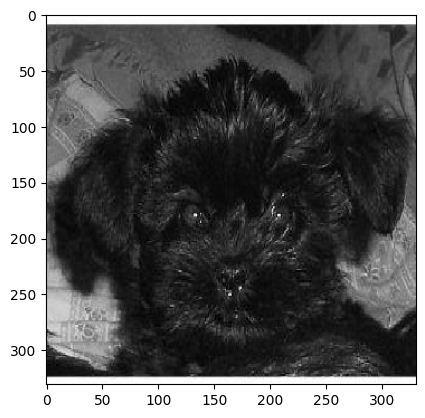

In [58]:
plt.imshow(img_g[0])

In [67]:
# #Predict test labels given test data features.
test_features = extact_features(img_g)
predg = model.predict(test_features)
print(f"Predicted label: {classes[np.argmax(predg[0])]}")
print(f"Probability of prediction): {round(np.max(predg[0])) * 100} %")

1/1 [==============================] - 3s 3s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 2s 2s/step
Feature maps shape:  (1, 2048)
1/1 [==============================] - 6s 6s/step
Feature maps shape:  (1, 4032)


1/1 [==============================] - 4s 4s/step
Feature maps shape:  (1, 1536)
Final feature maps shape (1, 9664)


1/1 [==============================] - 0s 66ms/step
Predicted label: affenpinscher
Probability of prediction): 100 %


Cho ra kết quả chính xác

Nhận xét: tuy hiệu quả cao nhưng vì phải áp dụng 4 mô hình + mô hình phân tách nhãn nên để dự đoán cần thời gian khá lâu